In [1]:
pip install ipywidgets plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install ipywidgets plotly networkx

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install ipywidgets matplotlib networkx

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import ipywidgets as widgets
import plotly.graph_objs as go
from IPython.display import display
import networkx as nx
import numpy as np

In [5]:
# Importación de librerías necesarias
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import coo_matrix
from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence
from igraph import Graph
from IPython.display import SVG, display
import plotly.graph_objects as go
import networkx as nx
from itertools import combinations
import argparse
import numpy as np
import gudhi
import matplotlib.pyplot as plot
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

In [6]:
def count_strains(labels):
    strain_counts = {}
    strain_colors = {
        'H9N2': 'blue',
        'H7N9': 'orange',
        'H7N3': 'green'
    }
    for label in labels:
        strain = label.split('(')[1].split(')')[0]  # Extrae la cepa entre paréntesis
        strain_counts[strain] = strain_counts.get(strain, 0) + 1
    print("Número de secuencias para la prueba:")
    for strain, count in strain_counts.items():
        color = strain_colors.get(strain, 'gray')
        print(f"{strain} = {count} ({color})")
    return strain_colors

In [7]:
# Definir la matriz de distancia
sG3 = [[   0., 1422., 1383., 1337., 1319., 1032., 2114., 1684., 1786., 1801.],
                   [1422.,    0.,  294.,  651.,  639., 1303., 1220., 2027., 2092., 2120.],
                   [1383.,  294.,    0.,  581.,  571., 1274., 1295., 2020., 2083., 2103.],
                   [1337.,  651.,  581.,    0.,   73., 1470., 1645., 2161., 2038., 2057.],
                   [1319.,  639.,  571.,   73.,    0., 1452., 1634., 2150., 2026., 2049.],
                   [1032., 1303., 1274., 1470., 1452.,    0., 2080., 1673., 1982., 1999.],
                   [2114., 1220., 1295., 1645., 1634., 2080.,    0., 1092., 1690., 1711.],
                   [1684., 2027., 2020., 2161., 2150., 1673., 1092.,    0., 1526., 1535.],
                   [1786., 2092., 2083., 2038., 2026., 1982., 1690., 1526.,    0.,   75.],
                   [1801., 2120., 2103., 2057., 2049., 1999., 1711., 1535.,   75.,    0.]]



# Convertir la lista a una matriz NumPy
sG3 = np.array(sG3)

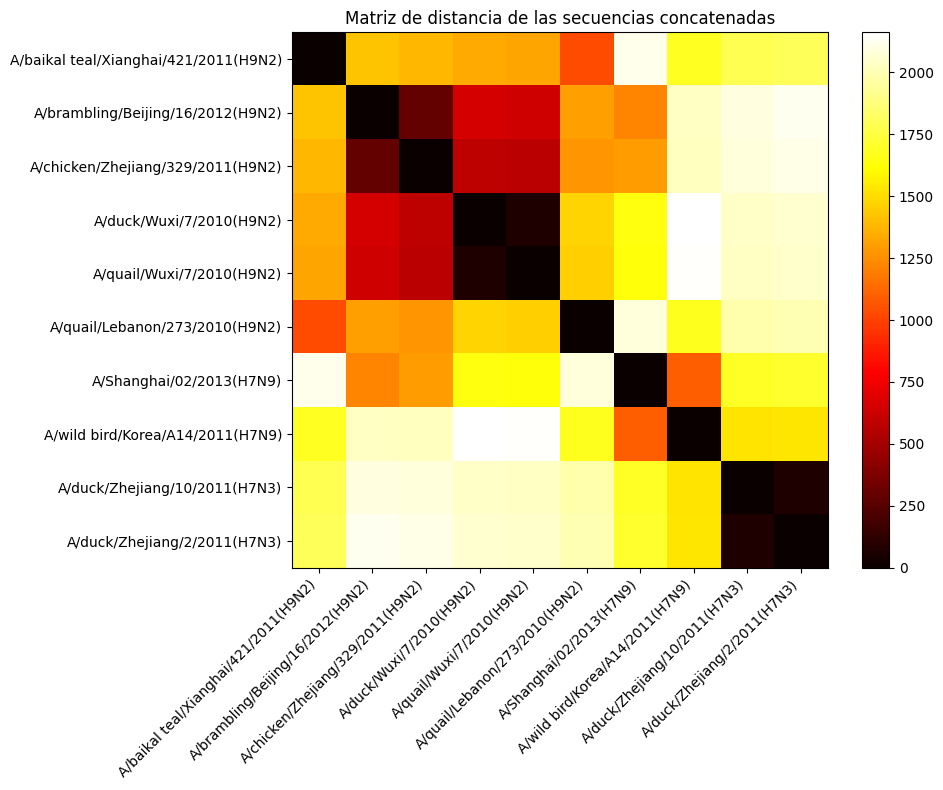

In [8]:
# Definir las etiquetas para las columnas y filas
labels = [
'A/baikal teal/Xianghai/421/2011(H9N2)',
'A/brambling/Beijing/16/2012(H9N2)',
'A/chicken/Zhejiang/329/2011(H9N2)',
'A/duck/Wuxi/7/2010(H9N2)',
'A/quail/Wuxi/7/2010(H9N2)',
'A/quail/Lebanon/273/2010(H9N2)',
'A/Shanghai/02/2013(H7N9)',
'A/wild bird/Korea/A14/2011(H7N9)',
'A/duck/Zhejiang/10/2011(H7N3)',
'A/duck/Zhejiang/2/2011(H7N3)'
]

# Crea una figura con 1 fila y 1 columna
fig, ax = plot.subplots(1, 1, figsize=(10, 8))

# Grafica la matriz sG3 como una gráfica de calor
im = ax.imshow(sG3, cmap='hot')

# Personaliza el subplot
ax.set_title('Matriz de distancia de las secuencias concatenadas')

# Establece las posiciones y etiquetas para las columnas y filas
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

# Agrega una barra de colores
cbar = fig.colorbar(im, ax=ax)

# Muestra la figura
plot.tight_layout()
plot.show()

In [9]:
# Configurar parámetros para el complejo de Rips
max_edge_length = 2300
max_dimension = 5
band = 0.0

print("#####################################################################")
print("RipsComplex creation from defined distance matrix G3")


# Crear el complejo de Rips
rips_complex = gudhi.RipsComplex(
   distance_matrix=sG3, max_edge_length=max_edge_length  
)

#####################################################################
RipsComplex creation from defined distance matrix G3


In [10]:
# Crear el árbol de simplex
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
   
message = "Number of simplices=" + repr(simplex_tree.num_simplices()) 
print(message)

# Calcular la persistencia
diag = simplex_tree.persistence()

print("betti_numbers()=")
print(simplex_tree.betti_numbers())

Number of simplices=847
betti_numbers()=
[1, 0, 0, 0, 0]


usetex mode requires dvipng.


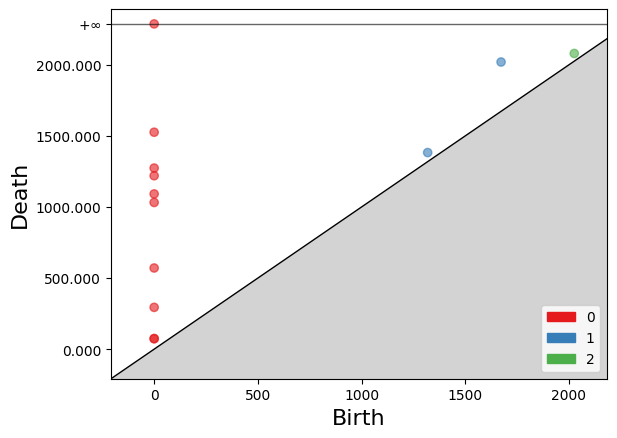

In [11]:
# Mostrar el diagrama de persistencia
gudhi.plot_persistence_diagram(diag, band=band)
plot.title("")
plot.show()

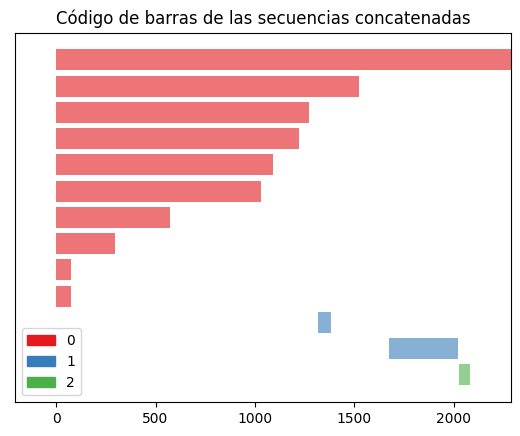

In [12]:
# Mostrar el código de barras
gudhi.plot_persistence_barcode(diag)
plot.title("Código de barras de las secuencias concatenadas")
plot.show()

In [13]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
   
message = "Number of simplices=" + repr(simplex_tree.num_simplices()) 
print(message)
  
diag = simplex_tree.persistence()

print("betti_numbers()=")
print(simplex_tree.betti_numbers())

# Add this new code to print birth and death times for 1D and 2D holes
print("\nPersistence intervals for 1-dimensional holes:")
for interval in simplex_tree.persistence_intervals_in_dimension(1):
    print(f"Birth: {interval[0]}, Death: {interval[1]}")

print("\nPersistence intervals for 2-dimensional holes:")
for interval in simplex_tree.persistence_intervals_in_dimension(2):
    print(f"Birth: {interval[0]}, Death: {interval[1]}")

Number of simplices=847
betti_numbers()=
[1, 0, 0, 0, 0]

Persistence intervals for 1-dimensional holes:
Birth: 1319.0, Death: 1383.0
Birth: 1673.0, Death: 2020.0

Persistence intervals for 2-dimensional holes:
Birth: 2026.0, Death: 2080.0


In [14]:
import plotly.io as pio
pio.renderers.default = "notebook"

In [15]:
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
import numpy as np
import plotly.graph_objs as go

def visualize_simplicial_complex(simplex_tree, vertex_names):
    def update_plot(filtration_value):
        G = nx.Graph()
        triangles = []
        tetrahedra = []
        edges = []
        hole_2d_simplices = []

        # Find 2D hole
        persistence_2 = simplex_tree.persistence_intervals_in_dimension(2)
        hole_birth = persistence_2[0][0] if len(persistence_2) > 0 else None

        # Process each simplex in the simplex tree
        for simplex, filt in simplex_tree.get_filtration():
            if filt <= filtration_value:
                if len(simplex) == 2:
                    G.add_edge(simplex[0], simplex[1])
                    edges.append(simplex)
                elif len(simplex) == 1:
                    G.add_node(simplex[0])
                elif len(simplex) == 3:
                    triangles.append(simplex)
                    if filt == hole_birth:
                        hole_2d_simplices.append(simplex)
                elif len(simplex) == 4:
                    tetrahedra.append(simplex)

        # Create graph layout
        pos = nx.spring_layout(G, dim=3)

        # Create traces for nodes
        node_x, node_y, node_z = zip(*[pos[node] for node in G.nodes()])
        node_labels = [vertex_names[node] if vertex_names else str(node) for node in G.nodes()]
        node_colors = ['blue' if 'H9N2' in label else 'orange' if 'H7N9' in label else 'green' for label in node_labels]
        node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers+text', 
                                  marker=dict(size=5, color=node_colors),
                                  text=node_labels, textposition="top center", 
                                  hoverinfo='text')

        # Create traces for edges
        edge_x, edge_y, edge_z = [], [], []
        edge_colors = []
        for edge in G.edges():
            x0, y0, z0 = pos[edge[0]]
            x1, y1, z1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
            edge_z.extend([z0, z1, None])
            is_hole_edge = any(set(edge).issubset(triangle) for triangle in hole_2d_simplices)
            edge_colors.extend(['yellow' if is_hole_edge else 'black'] * 3)
        edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines', 
                                  line=dict(width=2, color=edge_colors), hoverinfo='none')

        # Create traces for triangles
        triangle_traces = []
        for triangle in triangles:
            x = [pos[v][0] for v in triangle]
            y = [pos[v][1] for v in triangle]
            z = [pos[v][2] for v in triangle]
            color = 'yellow' if triangle in hole_2d_simplices else 'red'
            opacity = 0.7 if triangle in hole_2d_simplices else 0.3
            triangle_trace = go.Mesh3d(x=x, y=y, z=z, opacity=opacity, color=color)
            triangle_traces.append(triangle_trace)

        # Create traces for tetrahedra
        tetrahedra_traces = []
        for tetrahedron in tetrahedra:
            x = [pos[v][0] for v in tetrahedron]
            y = [pos[v][1] for v in tetrahedron]
            z = [pos[v][2] for v in tetrahedron]
            tetrahedron_trace = go.Mesh3d(x=x, y=y, z=z, opacity=0.1, color='green')
            tetrahedra_traces.append(tetrahedron_trace)

        # Create the figure and add the traces
        fig = go.Figure(data=[node_trace, edge_trace] + triangle_traces + tetrahedra_traces)

        fig.update_layout(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            ),
            margin=dict(r=0, l=0, b=0, t=0),
            showlegend=False,
            width=800,
            height=600,
            title=f'Complejo Simplicial en el Valor de Filtración {filtration_value}'
        )

        return fig

    # Create a slider widget
    slider = widgets.IntSlider(
        value=0,
        min=0,
        max=2080,
        step=1,
        description='Filtración:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    # Create a text input widget
    text_input = widgets.BoundedIntText(
        value=0,
        min=0,
        max=2080,
        step=1,
        description='Valor:',
        disabled=False
    )

    # Create an output widget to display the plot
    out = widgets.Output()

    # Function to update the plot when the value changes
    def update_visualization(change):
        new_value = change['new']
        slider.value = new_value
        text_input.value = new_value
        with out:
            out.clear_output(wait=True)
            print(f"Actualizando el gráfico para el valor de filtración: {new_value}")
            fig = update_plot(new_value)
            fig.show()
            print("Gráfico actualizado. Deberías ver un gráfico 3D interactivo arriba.")

    # Connect the function to both the slider and text input
    slider.observe(update_visualization, names='value')
    text_input.observe(update_visualization, names='value')

    # Display the initial plot
    with out:
        print("Inicializando el gráfico...")
        fig = update_plot(0)
        fig.show()
        print("Gráfico inicial creado. Deberías ver un gráfico 3D interactivo arriba.")

    # Display the slider, text input, and the plot
    display(widgets.VBox([widgets.HBox([slider, text_input]), out]))

# Use the function
visualize_simplicial_complex(simplex_tree, labels)

In [16]:
!pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
iplot(fig)